# PRIP Assignment 1: Problem 2.2
### Subrat Prasad Panda, M.Tech(CS), Roll No: CS1913

Question:
Let’s say you want to buy a new flat and thus need to estimate a bank loan. You surveyed the newspapers for the price of 10 random flats spread across your city. However, the surveyed flats are of different sizes having diverse range of essential amenities. Thus, you created the following Table 1 listing the size of a flat, the number of bedrooms in that flat, and the corresponding price. You want to buy a flat which is about 950-1050 sq. ft. in size having either 2 or 3 bedrooms. Estimate the upper and lower limit of the bank loan given the data in Table 1.

    2.2.a Write a code which will provide you the least square estimation by solving the closed form solution for such problems.

    2.2.b Write a code which will provide you the least square estimate by solving the problem using a gradient decent approach. Plot the convergence of the model parameters over successive iterations.

    2.2.c Plot the flat prices as a function of flat size and number of bedrooms. Draw the least square estimators obtained respectively by solving the closed form solution and by gradient descent. Plot your least square estimations for the bank loan in both cases.

    2.2.d Download the Portland House Price Prediction Dataset https://www.kaggle.com/ kennethjohn/housingprice. Report the 10-fold cross validation mean squared error of your least square estimation model trained by gradient descent.

Import the required libraries: numpy, matplotlib

In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

np.set_printoptions(suppress=True) 

#### Equation for solving the closed form:
\begin{equation*}
Xz = y \\
z = (X^{T}X)^{-1}X^{T}y
\end{equation*}
#### Predicted values will be:
\begin{equation*}
Xz = \hat{y} \\
where, z = [z_0, z_1, z_2]^T
\end{equation*}
$z$ needs to be computed.

##### Utility Functions

In [2]:
def process_data(data):
    '''
    #1. Separate the data into X:(house size, #of bed rooms), y:housing price
    #2. Standarize the data
    #3. Concatenate column vector of 1 to the matrix X
    '''
    #1. Separate X and y into
    X = data[:, :2].copy()
    y = data[:, 2:].copy()

    #2. Feature Scaling using 
    meanX = np.mean(X, axis=0)
    stdX = np.std(X, axis=0)
    X = (X - meanX)/stdX

    #3. add column of 1's to the matrix X_
    X = np.c_[np.ones(X.shape[0]), X]
    return X, y, meanX, stdX

def mse(X, y, z):
    '''
    Compute Mean of Squared Error
    '''
    np.seterr(over='raise')
    n = X.shape[0] #number of samples
    y_hat = np.dot(X, z)
    loss = y_hat - y
    J = np.sum(loss ** 2) / (2 * n)  # squared error function
    return J

def batch_gradient_descent(X, y, learning_rate, epochs, verbose=False, kfold=False, **kwargs):
    '''
    Function to perform Batch Gradient Descent for Linear Regression.
    '''
    #Cache the data to plot
    squared_error = []
    z_cache = []
    n = X.shape[0]
    
    # Initialize the z: Coefficient Vector
    if not kfold:
        z = np.random.rand(3,1) #Initialize z with random values
    else:
        z = kwargs['z'] # Use z values from previous training in KFolds validation
    #Plot error while training(optional)
    if verbose:
        %matplotlib inline
        fig1 = plt.figure()  # create a figure object
        ax1 = fig1.add_subplot(1, 1, 1)  # create an axes object in the figure
        ax1.set_title("Squared Error vs Epoch")
        ax1.set_xlabel('Epoch', fontweight ='bold') 
        ax1.set_ylabel('Squared Error', fontweight ='bold') 
    
    for i in range(0, epochs):
        # y_hat is the predicted value
        y_hat = np.dot(X, z)
        loss = y_hat - y
        J = np.sum(loss ** 2) / (2 * n)  # squared error function
        squared_error.append(J) #store cost value over iteration   
        gradient = np.dot(X.T, loss) / n  #compute the gradients
        z_cache.append(z.copy()) #store z value over iteration
        z -= learning_rate * gradient  # update the value of z
        if verbose:
            print(f"Epoch: {i} | Mean Squared Error: {J}")
            ax1.scatter(i,J)
    
    #Final evaluation after the epochs 
    y_hat = np.dot(X, z) # final predicted y
    loss = y_hat - y
    J = np.sum(loss ** 2) / (2 * n)  # cost function
    squared_error.append(J)
    z_cache.append(z.copy())
       
    return z, z_cache, squared_error

##### Read and Standardize the Data of Table 1(Stored as CSV)

In [3]:
#Read Data from the CSV file
price_data = genfromtxt('datasets/table1.csv', delimiter=',')
X, y, meanX, stdX  = process_data(price_data) #call process_data function to standardize the data

## Problem 2.2.a

In [4]:
#Closed form solution
z = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = X@z #matrix multiplication
z_closedform = z.copy()
print(f"Coeff Closed Form:{z_closedform}")
print(f"MSE:{mse(X, y, z)}")

Coeff Closed Form:[[6.29      ]
 [1.36520446]
 [1.31070125]]
MSE:0.46729428024395486


## Problem 2.2.b

#### Train using Batch Gradient Descend

Epoch: 0 | Mean Squared Error: 17.05099845561088
Epoch: 1 | Mean Squared Error: 13.700263850667236
Epoch: 2 | Mean Squared Error: 11.052516939968534
Epoch: 3 | Mean Squared Error: 8.952451990348726
Epoch: 4 | Mean Squared Error: 7.2813820030402
Epoch: 5 | Mean Squared Error: 5.947955686285233
Epoch: 6 | Mean Squared Error: 4.881398706281105
Epoch: 7 | Mean Squared Error: 4.0265508952309075
Epoch: 8 | Mean Squared Error: 3.3401908116939945
Epoch: 9 | Mean Squared Error: 2.7882904195231566
Epoch: 10 | Mean Squared Error: 2.343947361823236
Epoch: 11 | Mean Squared Error: 1.9858150751488175
Epoch: 12 | Mean Squared Error: 1.6969018249968477
Epoch: 13 | Mean Squared Error: 1.4636454650040434
Epoch: 14 | Mean Squared Error: 1.275195985056788
Epoch: 15 | Mean Squared Error: 1.1228559055830454
Epoch: 16 | Mean Squared Error: 0.9996414860917039
Epoch: 17 | Mean Squared Error: 0.8999370547741441
Epoch: 18 | Mean Squared Error: 0.8192215773209808
Epoch: 19 | Mean Squared Error: 0.7538515935124164

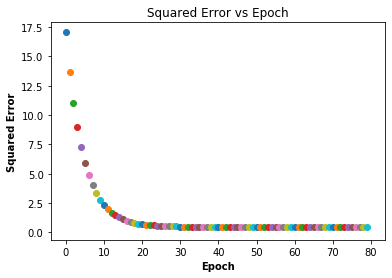

In [5]:
#call gradient descend
z, z_cache, squared_error = batch_gradient_descent( X, y, learning_rate=0.1, epochs=80, verbose=True)
print(f"Coeff using GD:{z}")

## Problem 2.2.c
#### Plot the Convergence of 'z': Animation
**Re-run from beginning to replay as some variables gets overwritten afterwards

<IPython.core.display.Javascript object>


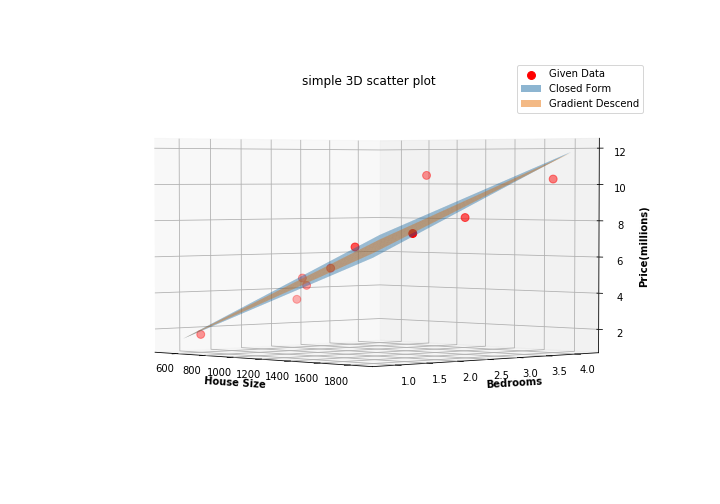

Please wait while Animating Convergence....
Plotting Finished


<IPython.core.display.Javascript object>


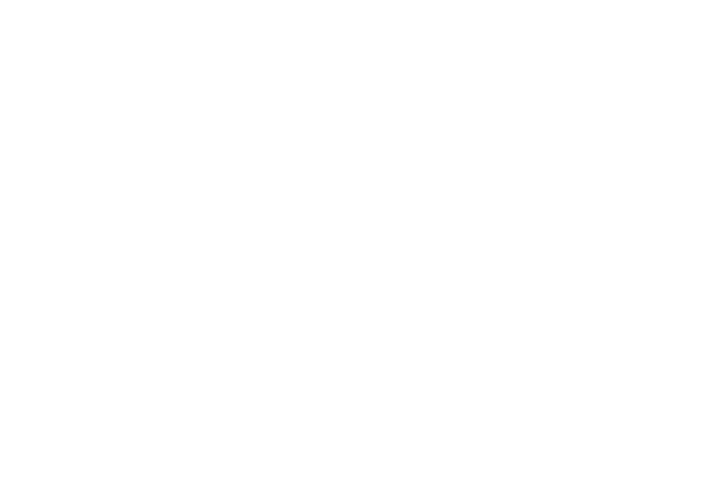

In [6]:
%matplotlib notebook
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.view_init(elev=2, azim=-44)
print("Please wait while Animating Convergence....")
for i in range(len(z_cache)):
    ax.cla() #clear axis
    plot1 = ax.scatter3D(price_data[:, 0], price_data[:, 1], price_data[:, 2], s=250, c='r', marker='.', zorder=1, label="Given Data")
    
    # Create Meshgrid from x, y
    xlim = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    ylim = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    X_axis,Y_axis = np.meshgrid(xlim,ylim)
    
    #Plot plane from closed form coefficients
    Z_axis = z_closedform[0] + z_closedform[1]*(X_axis-meanX[0])/stdX[0] + z_closedform[2]*(Y_axis-meanX[1])/stdX[1]
    plot2 = ax.plot_surface(X_axis, Y_axis, Z_axis, alpha=0.5, zorder = 1, label="Closed Form") #cmap='viridis'
    
    #Plot Plane from the gradient descend
    Z_axis = z_cache[i][0] + z_cache[i][1]*(X_axis-meanX[0])/stdX[0] + z_cache[i][2]*(Y_axis-meanX[1])/stdX[1]
    plot3 = ax.plot_surface(X_axis, Y_axis, Z_axis, alpha=0.5, zorder = 2, label="Gradient Descend") #cmap='viridis'
    
    #Add plot attributed
    plt.title("simple 3D scatter plot")
    ax.set_xlabel('House Size', fontweight ='bold') 
    ax.set_ylabel('Bedrooms', fontweight ='bold') 
    ax.set_zlabel('Price(millions)', fontweight ='bold')
    
    #Put Legends on the Plot
    plot3._facecolors2d=plot3._facecolors3d
    plot3._edgecolors2d=plot3._edgecolors3d
    plot2._facecolors2d=plot2._facecolors3d
    plot2._edgecolors2d=plot2._edgecolors3d
    plt.legend()
    fig.canvas.draw()
print("Plotting Finished")

## Problem 2.2.d
### 10 Fold Cross Validation of Housing Data from Kaggle

In [7]:
#Load dataset
housing_data = genfromtxt('datasets/housing.txt', delimiter=',')
X, y, meanX, stdX = process_data(housing_data) #preprocess the data

# Scale down the values of y: as the values of y is in range 399 900
# Divide y with 10^5 hence it will be in range [2, 5]
y = y/(10**5)

In [8]:
from sklearn.model_selection import KFold
# prepare 10 fold cross validation
kfold = KFold(10, True, 1)

sum_mse = 0 #init mse sum with 0
z = np.random.rand(3,1) #Initialize z with random values
for train, test in kfold.split(X):
    #kfold:True to use the z values from previous training
    z, z_cache, squared_error = batch_gradient_descent( X[train], y[train], learning_rate=0.1, epochs=150, kfold=True, z=z)
    sum_mse += mse(X[test], y[test], z)

#Compute the average of mean squared error over 10 folds of testing
avg_mse = sum_mse/10
print(f"Coeff(z) from KFold: {z}" )
print(f"Mean Squared Error(10 Folds): {avg_mse}")

Coeff(z) from KFold: [[ 3.39854293]
 [ 1.10438514]
 [-0.06844011]]
Mean Squared Error(10 Folds): 0.21613322151530623


### Results compared by solving with Closed Form

In [9]:
#Closed for solution
z = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
y_hat = X@z #matrix multiplication
z_closedform = z.copy()
print(f"Coeff Closed Form:{z_closedform}")
print(f"MSE Closed Form:{mse(X, y, z)}")

Coeff Closed Form:[[ 3.4041266 ]
 [ 1.09447796]
 [-0.06578355]]
MSE Closed Form:0.20432800506028276


### Conclusion:
Hence it's validated that 10-Fold validation produces results comprable to closed form solution.